In [144]:
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


file_path = "../Resources/Original_Data.csv"
original_df = pd.read_csv(file_path)
original_df.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25 14:08:01,2011-08,2014-07-23,0,1,1,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04 16:14:36,2017-03,2018-09-06,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25 14:08:01,2009-10,2014-05-14,0,1,1,0,0,0


In [145]:
project_data = original_df[["pl_name", "hostname", "disc_year", "sy_snum", "sy_pnum", "pl_rade", "pl_masse", 
                            "pl_dens", "pl_orbper", "pl_orbsmax", "pl_eqt", "st_teff", 
                            "st_rad", "st_mass", "st_dens", "sy_dist"]]
project_data.head()

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,sy_dist
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.03000,1.29,NaN,4742.0,19.00,2.70,NaN,93.1846
1,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,NaN,1.21,NaN,NaN,NaN,2.60,NaN,93.1846
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.51,NaN,NaN,NaN,1.70,NaN,125.3210
3,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,516.21997,1.53,NaN,4213.0,29.79,2.78,NaN,125.3210
4,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,516.22000,1.54,NaN,4340.0,24.08,1.80,NaN,125.3210


In [146]:
no_dup_data = project_data.drop_duplicates(subset = ["pl_name"])
no_dup_data

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,sy_dist
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.030000,1.290000,NaN,4742.0,19.00,2.7,NaN,93.1846
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,NaN,1.7,NaN,125.3210
5,14 And b,14 And,2008,1,1,NaN,NaN,NaN,185.840000,0.830000,NaN,4813.0,11.00,2.2,NaN,75.4392
7,14 Her b,14 Her,2002,1,1,NaN,NaN,NaN,NaN,2.730000,NaN,NaN,NaN,0.9,NaN,17.9323
13,16 Cyg B b,16 Cyg B,1996,3,1,NaN,NaN,NaN,800.800000,1.600000,NaN,5760.0,NaN,1.0,NaN,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26809,tau Gem b,tau Gem,2013,1,1,NaN,NaN,NaN,305.500000,1.170000,NaN,4388.0,26.80,2.3,NaN,112.5370
26811,ups And b,ups And,1996,2,3,NaN,NaN,NaN,4.617033,0.059222,NaN,NaN,1.56,1.3,NaN,13.4054
26816,ups And c,ups And,1999,2,3,NaN,NaN,NaN,238.100000,0.821000,NaN,NaN,NaN,NaN,NaN,13.4054
26820,ups And d,ups And,1999,2,3,NaN,NaN,NaN,1274.600000,2.510000,NaN,NaN,NaN,NaN,NaN,13.4054


In [147]:
no_dup_data.dropna()

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,sy_dist
160,CoRoT-10 b,CoRoT-10,2010,1,1,10.548,883.56740,4.1600,13.240600,0.10600,647.0,5075.0,0.74,0.90,3.1000,338.386
168,CoRoT-12 b,CoRoT-12,2010,1,1,15.132,281.91521,0.4480,2.828042,0.03940,1410.0,5675.0,1.05,1.02,1.2500,1126.370
175,CoRoT-14 b,CoRoT-14,2010,1,1,11.411,2437.75610,9.0000,1.512140,0.02687,1936.0,6035.0,1.19,1.12,0.9400,1744.600
180,CoRoT-17 b,CoRoT-17,2011,1,1,11.287,781.86180,3.0058,3.768100,0.04810,1610.0,5740.0,1.62,1.04,0.3420,1176.120
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.2490,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.0270,627.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.1180,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.4850,211.211
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.2100,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.3100,151.068
26682,WTS-1 b,WTS-1,2012,1,1,16.700,1274.44000,1.6100,3.352057,0.04700,1500.0,6250.0,1.15,1.20,1.1129,2346.010
26732,XO-5 b,XO-5,2008,1,1,12.780,378.20000,1.0600,4.187756,0.05150,1230.0,5430.0,1.13,1.04,1.0100,276.211


In [148]:
rename_df = no_dup_data.rename(columns = {"pl_name": "Planet_Name", "hostname": "Star_Name", "disc_year": "Discover_Year",
                                          "sy_snum": "Number_of_Stars", "sy_pnum": "Number_of_Planets", "pl_rade": "Planet_Radius",
                                          "pl_masse": "Planet_Mass", "pl_dens": "Planet_Density", "pl_orbper": "Planet_Orbital_Period (Days)",
                                          "pl_orbsmax": "Planet_Orbital_Semi_Major_Axis (au)", "pl_eqt": "Planet_Equilibrium_Temp (K)",
                                          "st_teff": "Stellar_Effective_Temp (K)", "st_rad": "Stellar_Radius", "st_mass": "Stellar_Mass", 
                                          "st_dens": "Stellar_Density","sy_dist": "System_Distance (pc)"})
rename_df

,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period (Days),Planet_Orbital_Semi_Major_Axis (au),Planet_Equilibrium_Temp (K),Stellar_Effective_Temp (K),Stellar_Radius,Stellar_Mass,Stellar_Density,System_Distance (pc)
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.030000,1.290000,NaN,4742.0,19.00,2.7,NaN,93.1846
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,NaN,1.7,NaN,125.3210
5,14 And b,14 And,2008,1,1,NaN,NaN,NaN,185.840000,0.830000,NaN,4813.0,11.00,2.2,NaN,75.4392
7,14 Her b,14 Her,2002,1,1,NaN,NaN,NaN,NaN,2.730000,NaN,NaN,NaN,0.9,NaN,17.9323
13,16 Cyg B b,16 Cyg B,1996,3,1,NaN,NaN,NaN,800.800000,1.600000,NaN,5760.0,NaN,1.0,NaN,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26809,tau Gem b,tau Gem,2013,1,1,NaN,NaN,NaN,305.500000,1.170000,NaN,4388.0,26.80,2.3,NaN,112.5370
26811,ups And b,ups And,1996,2,3,NaN,NaN,NaN,4.617033,0.059222,NaN,NaN,1.56,1.3,NaN,13.4054
26816,ups And c,ups And,1999,2,3,NaN,NaN,NaN,238.100000,0.821000,NaN,NaN,NaN,NaN,NaN,13.4054
26820,ups And d,ups And,1999,2,3,NaN,NaN,NaN,1274.600000,2.510000,NaN,NaN,NaN,NaN,NaN,13.4054


In [149]:

df_data = {'Planet Names' : rename_df['Planet_Name'], 'Star Names' : rename_df['Star_Name'], 
          'Number of Stars' : rename_df['Number_of_Stars'], 'Number of Planets' : rename_df['Number_of_Planets'],
           'Planet EQM Temp (K)':rename_df['Planet_Equilibrium_Temp (K)'],'System Distance (pc)':rename_df['System_Distance (pc)'],
           'Planet Radius (R⊕)':rename_df['Planet_Radius']}
                                                                                                          

# Add Stellar Metallicity column from original file
df_data['Stellar Metallicity (dex)'] = original_df['st_met']

# Make clean dataframe with null values changes to 0.
goldilocks_df = pd.DataFrame(df_data)
clean_goldilocks = goldilocks_df.dropna()
clean_goldilocks.head(20)




# The unit often used for metallicity is the dex, contraction of 
# "decimal exponent". By this formulation, stars with a higher metallicity 
# than the Sun have a positive logarithmic value, whereas those with a 
# lower metallicity than the Sun have a negative value.




,Planet Names,Star Names,Number of Stars,Number of Planets,Planet EQM Temp (K),System Distance (pc),Planet Radius (R⊕),Stellar Metallicity (dex)
155,CoRoT-1 b,CoRoT-1,1.0,1.0,1898.0,787.909,16.700,-0.300
160,CoRoT-10 b,CoRoT-10,1.0,1.0,647.0,338.386,10.548,0.260
168,CoRoT-12 b,CoRoT-12,1.0,1.0,1410.0,1126.370,15.132,0.160
175,CoRoT-14 b,CoRoT-14,1.0,1.0,1936.0,1744.600,11.411,0.050
180,CoRoT-17 b,CoRoT-17,1.0,1.0,1610.0,1176.120,11.287,0.000
206,CoRoT-22 b,CoRoT-22,1.0,1.0,885.0,627.158,4.880,0.170
207,CoRoT-23 b,CoRoT-23,1.0,1.0,1710.0,1060.970,13.227,0.050
210,CoRoT-24 b,CoRoT-24,1.0,2.0,1070.0,591.555,3.700,0.300
211,CoRoT-24 c,CoRoT-24,1.0,2.0,850.0,591.555,5.000,0.300
233,CoRoT-5 b,CoRoT-5,1.0,1.0,1348.0,882.472,13.249,-0.250


The more metals the stellar system and its planets have, the chances of gas giants and rocky planets forming increases.
Another factor affected is the planet equilibrium temperature.
Temperature increases because of the stellar radiation emitted by stars with high metallicity, causing a greenhouse effect.
Earth is shown as a green dot for comparison.


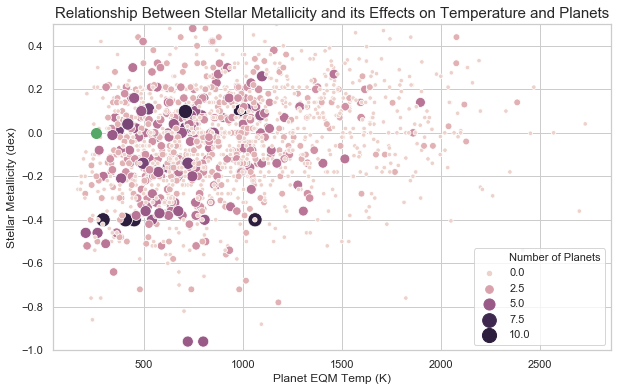

In [231]:
# Stellar Metallicity and Temperature effecting the number of planets

# Creating scatterplot comparing Planet EQM and Stellar Metallicity plotting the number of planets.
metallicity_and_temp = sns.scatterplot(x='Planet EQM Temp (K)', y='Stellar Metallicity (dex)', hue='Number of Planets',
                            data=clean_goldilocks, size='Number of Planets', sizes=(20,200))
# Setting y axis limits
metallicity_and_temp.set(ylim= (-1.0, 0.50))

# Creating title and plotting Earth's values
plt.title('Relationship Between Stellar Metallicity and its Effects on Temperature and Planets', fontsize=15)
# plt.subplots_adjust(top=1.0)
plt.plot(255.0, 0.00 , "go", markersize= 10)

# Changing figure size
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Analysis statements
print('The more metals the stellar system and its planets have, the chances of gas giants and rocky planets forming increases.') 
print('Another factor affected is the planet equilibrium temperature.') 
print('Temperature increases because of the stellar radiation emitted by stars with high metallicity, causing a greenhouse effect.')
print('Earth is shown as a green dot for comparison.')
          
#Works cited
#https://arxiv.org/pdf/1610.05765.pdf


plt.savefig("planets_and_metallicity") 

In [152]:
# Filter dataframe for planets that have same metallicity value as Earth.
habitable_planets = clean_goldilocks.loc[(clean_goldilocks['Stellar Metallicity (dex)'] ==0.00)]

# Number of possible habitable planets.
total = habitable_planets['Planet Names'].count()
print(f'There are {total} planets that have the same metallicity as Earth.')

habitable_planets.head()

There are 75 planets that have the same metallicity as Earth.


,Planet Names,Star Names,Number of Stars,Number of Planets,Planet EQM Temp (K),System Distance (pc),Planet Radius (R⊕),Stellar Metallicity (dex)
180,CoRoT-17 b,CoRoT-17,1.0,1.0,1610.0,1176.1200,11.287,0.0
257,CoRoTID 223977153 b,CoRoTID 223977153,1.0,1.0,938.0,576.6830,6.389,0.0
641,HAT-P-17 b,HAT-P-17,1.0,2.0,792.0,92.3831,11.321,0.0
820,HAT-P-53 b,HAT-P-53,1.0,1.0,1778.0,666.8020,14.773,0.0
898,HATS-15 b,HATS-15,1.0,1.0,1505.0,1139.5500,12.386,0.0


In [184]:
# Only those planets less than 10 Earth masses or 2.5 Earth radii 
# One Earth radius is 6378.14 km / 3,963.1906 mi

size_just_right = habitable_planets.loc[(habitable_planets['Planet Radius (R⊕)'] <= 2.50)]

# print(size_just_right['Planet Names'].count)

total_planets = len(size_just_right['Planet Names'])

print(f'There are {total_planets} planets that have the same or less than the radius of Earth.')

size_just_right.head()

There are 39 planets that have the same or less than the radius of Earth.


,Planet Names,Star Names,Number of Stars,Number of Planets,Planet EQM Temp (K),System Distance (pc),Planet Radius (R⊕),Stellar Metallicity (dex)
1840,HD 3167 b,HD 3167,1.0,3.0,1860.0,47.2899,1.557,0.0
3326,K2-275 b,K2-275,1.0,2.0,905.0,123.4380,2.240,0.0
3332,K2-275 c,K2-275,1.0,2.0,660.0,123.4380,2.340,0.0
3377,K2-285 d,K2-285,1.0,4.0,620.0,154.9610,2.480,0.0
3378,K2-285 e,K2-285,1.0,4.0,501.0,154.9610,1.950,0.0


Filtered all habitable planets by metallicity of 0 and radius size less than or equal to Earth's radius of 2.5


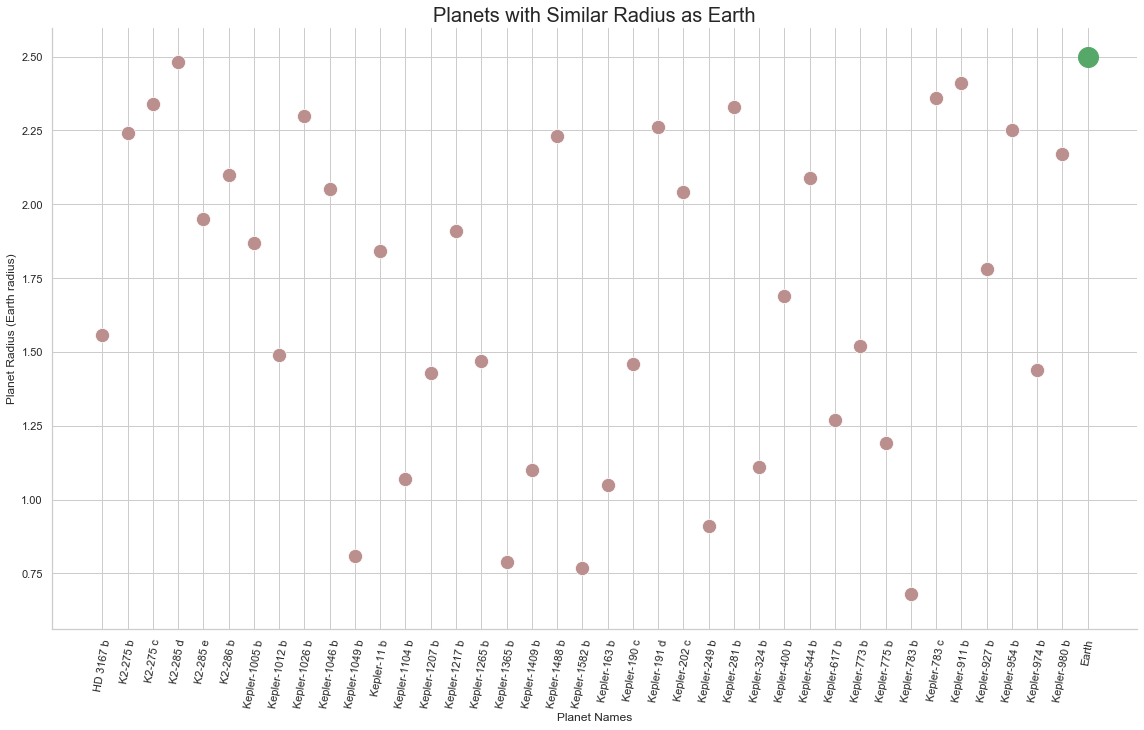

In [230]:
# Setting grid background
sns.set(style="whitegrid") 

# Plotting planet radius compared to Earth's size standard
radius_plot = sns.relplot( data = size_just_right,
                   x= 'Planet Names', y= "Planet Radius (R⊕)", facecolor='rosybrown', s=200)

# Creating title and adjusting position
plt.title("Planets with Similar Radius as Earth", fontsize=20)
radius_plot.set_axis_labels("Planet Names")


# Changing fig size
fig = plt.gcf()
fig.set_size_inches(20, 10)

# Labeling y-axis and positioning tick-marks to fit planet names 
plt.ylabel('Planet Radius (Earth radius)')
plt.xticks(rotation=80)


# Plotting Earth's temperature for comparison
plt.plot("Earth", 2.5 , "go", markersize= 20)

plt.savefig("same_radii") 

print(f"Filtered all habitable planets by metallicity of 0 and radius size less than or equal to Earth's radius of 2.5")

Took habitable planets with the same radius size as Earth and compared each of their EQM temperatures.
Temperatures between 0°C and 100°C (273.15-373.15 K) are expected for water to stay in liquid form.


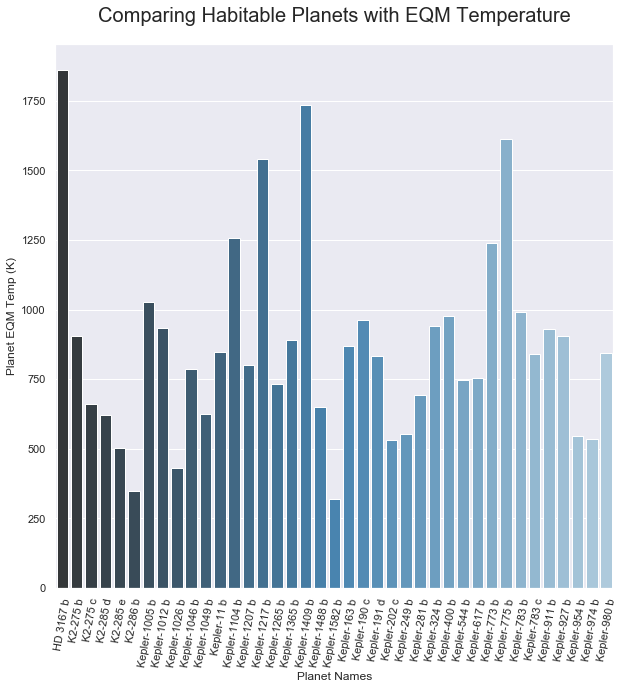

In [214]:
sns.set(style="darkgrid") 

# Comparing habitable planets with their planet EQM temperatures
comparing_temps = sns.barplot(x="Planet Names", y="Planet EQM Temp (K)", data=size_just_right, palette="Blues_d")


plt.title("Comparing Habitable Planets with EQM Temperature", y=1.03, fontsize= 20)
sns.set(rc={'figure.figsize':(20,20)})
plt.xticks(rotation=80)

# plt.show()

print(f"Took habitable planets with the same radius size as Earth and compared each of their EQM temperatures.")
print(f"Temperatures between 0°C and 100°C (273.15-373.15 K) are expected for water to stay in liquid form.")

plt.savefig('habitable_temps')

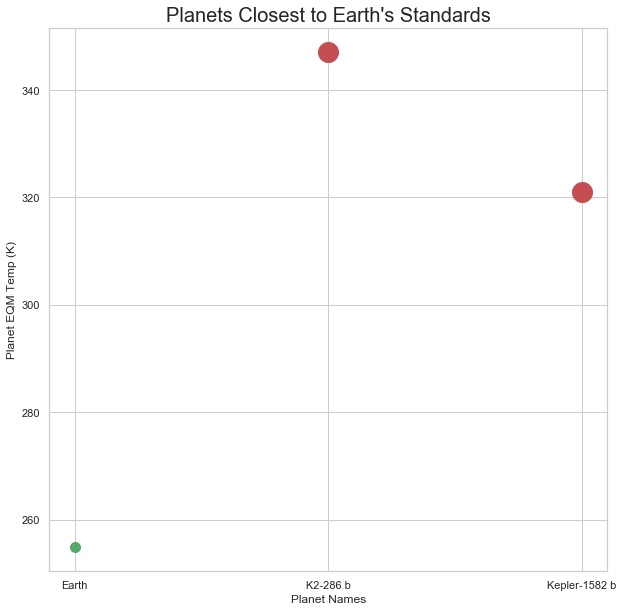

In [229]:
# For water to exist in liquid form, planet requires a temperature range between 0°C and 100°C. The real required range is more like 5°C to 40°C.

# sns.set(style="whitegrid") 

temp = size_just_right[(size_just_right['Planet EQM Temp (K)'] <373.15) & (size_just_right['Planet EQM Temp (K)'] >273.15)] 
earth = plt.plot("Earth", 255.0, "go", markersize= 10)
kepler = plt.plot(temp['Planet Names'], temp['Planet EQM Temp (K)'], 'ro', markersize=20, data=temp)

plt.title("Planets Closest to Earth's Standards", fontsize=20)
plt.xlabel("Planet Names")
plt.ylabel("Planet EQM Temp (K)")

# plt.show() 
# Changing fig size
fig = plt.gcf()
fig.set_size_inches(10, 10)
# While high metallicity is beneficial for the creation of terrestrial extrasolar planets, an excess amount can be harmful for life.
# Excess metallicity may lead to the formation of a large number of gas giants in a given system, disturbing planets that would otherwise 
# have been located in the system's habitable zone. Goldilocks principle is low-metallicity systems have low probabilities of forming terrestrial-mass 
# planets, while excessive metallicities cause a large number of gas giants to develop.

plt.savefig("same_temp") 